In [40]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

[{'box': [348, 367, 524, 696], 'confidence': 1.0, 'keypoints': {'left_eye': (425, 641), 'right_eye': (666, 644), 'nose': (494, 783), 'mouth_left': (444, 903), 'mouth_right': (640, 897)}}]
[{'box': [558, 271, 151, 191], 'confidence': 0.9997244477272034, 'keypoints': {'left_eye': (592, 340), 'right_eye': (663, 338), 'nose': (625, 375), 'mouth_left': (600, 412), 'mouth_right': (656, 409)}}]


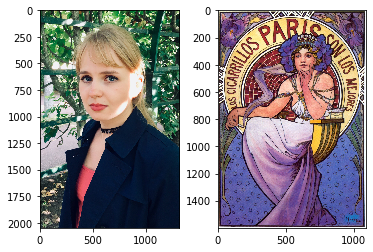

In [41]:
num = 4
file_c = '.\\Data\\c_'+str(num)+'.png'
picture_c = Image.open(file_c)
file_s = '.\\Data\\s_'+str(num)+'.png'
picture_s = Image.open(file_s)
face_c = open('.\\Data\\c_'+str(num)+'.txt', "r")
face_string_c = face_c.read()
face_string_c = "face_string_c = " + face_string_c

if face_string_c != 'face_string_c = ': 
    exec(face_string_c)
    print(face_string_c)
    box_c = face_string_c[0]['box']

else:
    print('No face here! Try different content image')

face_s = open('.\\Data\\s_'+str(num)+'.txt', "r")
face_string_s = face_s.read()
face_string_s = 'face_string_s = ' + face_string_s
if face_string_s != 'face_string_s = ': 
    exec(face_string_s)
    print(face_string_s)
    box_s = face_string_s[0]['box']

else:
    print('No faces here! Try different style image')

plt.subplot(1, 2, 1)
plt.imshow(picture_c)
plt.subplot(1, 2, 2)
plt.imshow(picture_s)     

In [42]:
def align(picture_c, picture_s, box_c, box_s):  
    width_c, height_c = picture_c.size
    width_s, height_s = picture_s.size
    
    center_c = [box_c[0] + int(box_c[2]/2.), box_c[1] + int(box_c[3]/2.)]
    center_s = [box_s[0] + box_s[2]/2, box_s[1] + box_s[3]/2]

    arr_c = np.array(picture_c)
    arr_s = np.array(picture_s)
    if box_c[2]*box_c[3] >= box_s[2]*box_s[3]: 
        lambd = np.sqrt(box_s[2] * box_s[3]/(box_c[2] * box_c[3]))
        picture_c_new = picture_c.resize(size = [int(width_c * lambd), int(height_c * lambd)])
        box_c_new = (np.array(box_c)*lambd).astype('int')
        center_c_new = (np.array(center_c)*lambd).astype('int')
        width_c_new, height_c_new = picture_c_new.size
        left = min(center_c_new[0], center_s[0])
        top = min(center_c_new[1], center_s[1])
        right = min(width_c_new - center_c_new[0], width_s - center_s[0])
        bottom = min(height_c_new - center_c_new[1], height_s - center_s[1])
        crop_c = picture_c_new.crop((center_c_new[0] - left, center_c_new[1] - top, center_c_new[0] + right, center_c_new[1] + bottom))
        crop_s = picture_s.crop((center_s[0] - left, center_s[1] - top, center_s[0] + right, center_s[1] + bottom))
        box = [int(box_c_new[0] - (center_c_new[0] - left)), int(box_c_new[1] - (center_c_new[1] - top)), box_c_new[2], box_c_new[3]] 
        
    else:
        lambd = np.sqrt(box_c[2] * box_c[3]/(box_s[2] * box_s[3]))
        picture_s_new = picture_s.resize(size = [int(width_s * lambd), int(height_s * lambd)])
        box_s_new = (np.array(box_s)*lambd).astype('int')
        center_s_new = (np.array(center_s)*lambd).astype('int')
        width_s_new, height_s_new = picture_s_new.size
        left = min(center_c[0], center_s_new[0])
        top = min(center_c[1], center_s_new[1])
        right = min(width_c - center_c[0], width_s_new - center_s_new[0])
        bottom = min(height_c - center_c[1], height_s_new - center_s_new[1])
        crop_c = picture_c.crop((center_c[0] - left, center_c[1] - top, center_c[0] + right, center_c[1] + bottom))
        crop_s = picture_s_new.crop((center_s_new[0] - left, center_s_new[1] - top, center_s_new[0] + right, center_s_new[1] + bottom))
        box = [int(box_s_new[0] - (center_s_new[0] - left)), int(box_s_new[1] - (center_s_new[1] - top)), box_s_new[2], box_s_new[3]]
    
    plt.subplot(1, 2, 1)
    plt.imshow(crop_c)
    plt.subplot(1, 2, 2)
    plt.imshow(crop_s)
    return {'content': crop_c, 'style': crop_s, 'box': box}


# Examples

## Align

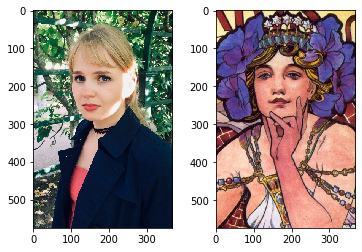

In [43]:
aligned = align(picture_c, picture_s, box_c, box_s)
box = aligned['box']

In [44]:
aligned['content'].save('.\\Data\\c_'+str(num)+'_crop.png')
aligned['style'].save('.\\Data\\s_'+str(num)+'_crop.png')

## Faces

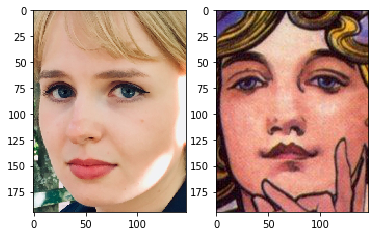

In [45]:
plt.subplot(1, 2, 1)
plt.imshow(np.array(aligned['content'])[box[1]:(box[1]+box[3]), box[0]:(box[0] + box[2]),:])
plt.subplot(1, 2, 2)
plt.imshow(np.array(aligned['style'])[box[1]:(box[1]+box[3]),(box[0]):(box[0] + box[2]),:])

In [46]:
box

[97, 103, 147, 195]